# 911 Calls

For this project we will do an exploratory data analysis about a record of 911 emergency calls in Montgomery County, PA. The dataset that we are going to work with was taken from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

As you may know 911 is the emergency telephone number for the US. Like other emergency numbers around the world, this number is intended for use in emergency circumstances only, and using it for any other purpose is a crime in most juridictions. 
Apart from the US it is also used as the emergency number in countries like Mexico, Canada, Argentina, Colombia or Panama among others. In european countries is used the 112 instead of 911 but many companies connect these two numbers either in the US or in the EU so you don't have to worry about which number you have to call.

<img src="emergencies.jpeg" style="width:400px;height=400px"/>

In [1]:
# First we import the needed libraries to work and visualize the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# Visualize our charts in our notebook
%matplotlib inline

In [3]:
# Connect interactive plots to our notebook
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# import the file
calls = pd.read_csv('911.csv')

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Here we can notice some things of interest. First of all this dataframe has 9 columns and 663522 rows. Also, we have only 2 columns where there are null values: zip & twp. Finally another interesting thing is that the timeStamp column is an object so we would have to convert it to a dataframe in order to work with it.   

In [6]:
# head of our dataframe
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Seeing this dataframe I see three thing that grab my attention. The first one is that in the title column we observe that there is an emergency topic: emergency description format. The second one is the e column that it appears to not make any sense at all since it's just the number 1 reapeated over and over. Finally, the timeStamp column is not ordered so we would have to do it by ourselves. Let's begin operating with the e column.

In [7]:
# Column e unique values
calls['e'].value_counts()

1    663522
Name: e, dtype: int64

In [8]:
# Let's drop the e column since we are not gonna make any use of it. 
calls.drop('e',axis=1,inplace=True)

In [9]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


Now let's focus in the title column. How many emergency topics are? 

In [10]:
calls['title'].apply(lambda title: title.split(':')[0]).unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In order to make it easier we can add a column in our dataframe with the emergency topic of each call.

In [11]:
calls['Topic'] = calls['title'].apply(lambda title: title.split(':')[0])

In [12]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


We can visualize how many calls we have for each emergency topic.

Text(0, 0.5, 'Number of calls')

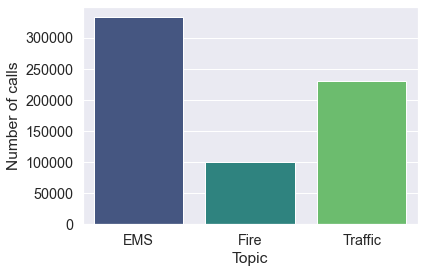

In [13]:
sns.set_style('darkgrid')
sns.set_context('notebook',font_scale=1.3)
sns.countplot(x='Topic',data=calls,palette='viridis')
plt.ylabel('Number of calls')

Now we would focus on the timeStamp column so we can maybe found some dependencies between other columns and the time of the call.

In [14]:
# Let's see what object type is our timeStamp column before working with it.

type(calls['timeStamp'].iloc[0])

str

In order to operate with the timeStamp we have to transform it from a string to a Datetime object.

In [15]:
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])

In [16]:
type(calls['timeStamp'].iloc[0]) 

pandas._libs.tslibs.timestamps.Timestamp

To access diferent data objects easier we make columns for some of the most important ones: year, month, day, hour & day of the week.

In [17]:
calls['Year'] = calls['timeStamp'].apply(lambda time: time.year)
calls['Month'] = calls['timeStamp'].apply(lambda time: time.month)
calls['Day'] = calls['timeStamp'].apply(lambda time: time.day)

Day of the week is returned as an integer from 0 to 6. Being 0 Monday and 6 Sunday so we should create a dictionay to match the actual string names with the integers 


In [18]:
dow={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
calls['Day of Week']=calls['timeStamp'].apply(lambda time: dow[time.dayofweek])
calls['Hour']=calls['timeStamp'].apply(lambda time: time.hour)

In [20]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,10,Thu,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,10,Thu,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,10,Thu,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,10,Thu,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,10,Thu,16


Now we can analyze our dataframe to see what is the spawn of the 911 calls. 

In [21]:
calls['Year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: Year, dtype: int64

In 2015 and 2020 there are way less calls that in the 2016-2019 period. This makes us think that there is not data for the whole year. For 2020 it's obvious that there is not since the year hasn't finished yet but it is true for 2015? 

In [22]:
# First we order the dataframe by the timestamp
calls = calls.sort_values(by='timeStamp')

In [23]:
calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,10,Thu,14
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,2015,12,10,Thu,15
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,EMS,2015,12,10,Thu,16
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,Traffic,2015,12,10,Thu,16
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,EMS,2015,12,10,Thu,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,2020,7,29,Wed,15
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,2020,7,29,Wed,15
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,Traffic,2020,7,29,Wed,15
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,2020,7,29,Wed,15


We can see that the data for 2015 is just from December 10th to new year and the data from 2020 is until July 29th. In order to make the data more realistic we will select the data from 2016-2019 when plotting about year/month. Unless we would have a disbalance between months/years that will make us arrive to wrong conclusions.

In [24]:
calls_1619=calls[(calls['Year']!=2020) & (calls['Year']!=2015)]

In [26]:
calls_1619

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,EMS,2016,1,1,Fri,0
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,EMS,2016,1,1,Fri,0
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,EMS,2016,1,1,Fri,0
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,EMS,2016,1,1,Fri,0
7925,40.235177,-75.290084,BROAD ST & WHITES RD; LANSDALE; Station 345; ...,19446.0,EMS: UNCONSCIOUS SUBJECT,2016-01-01 00:26:02,LANSDALE,BROAD ST & WHITES RD,EMS,2016,1,1,Fri,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591259,40.124561,-75.352770,NOBLE ST & W OAK ST; NORRISTOWN; Station 308A...,19401.0,EMS: CARDIAC ARREST,2019-12-31 23:13:34,NORRISTOWN,NOBLE ST & W OAK ST,EMS,2019,12,31,Tue,23
591260,40.223907,-75.196106,STONEY RIVER DR & PONDEROSA LN; HORSHAM; Stat...,19002.0,EMS: GENERAL WEAKNESS,2019-12-31 23:18:22,HORSHAM,STONEY RIVER DR & PONDEROSA LN,EMS,2019,12,31,Tue,23
591261,40.094338,-75.126801,SUMMIT AVE & LEEDOM ST; JENKINTOWN; Station 3...,19046.0,EMS: LACERATIONS,2019-12-31 23:27:54,JENKINTOWN,SUMMIT AVE & LEEDOM ST,EMS,2019,12,31,Tue,23
591262,40.094659,-75.362749,E DEKALB PIKE & N HENDERSON RD; UPPER MERION; ...,19406.0,Traffic: VEHICLE ACCIDENT -,2019-12-31 23:29:15,UPPER MERION,E DEKALB PIKE & N HENDERSON RD,Traffic,2019,12,31,Tue,23


Let's now plot our data by year, month, year of the week and hour and see at what conclusions we can arrive.

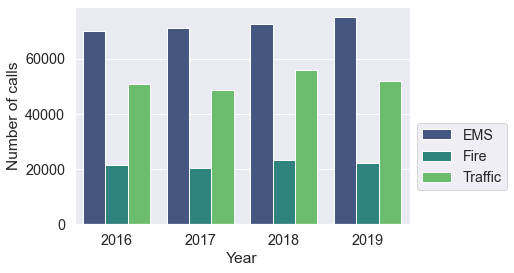

In [28]:
sns.countplot(x='Year',data=calls_1619,hue='Topic',palette='viridis')
plt.ylabel('Number of calls')
plt.legend(loc=0,bbox_to_anchor=(1.,0.5))

Emergency medical services (EMS) are the most common kind of emergency following by traffic emergencies and the less common is fire. Now let's do the same for month. We don't see any clear trend in this data since with maybe the exception of a slight increase in EMS emergencies over the years probably due to the aging of the population.

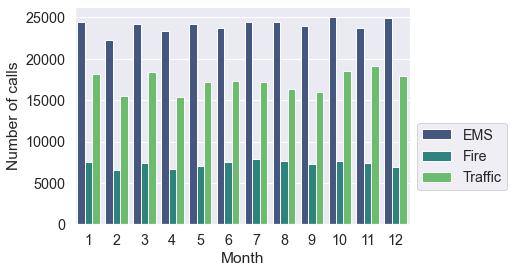

In [29]:
sns.countplot(x='Month',data=calls_1619,hue='Topic',palette='viridis')
plt.ylabel('Number of calls')
plt.legend(loc=0,bbox_to_anchor=(1.,0.5))

Again we have a very stable columns with perhaps the exception of a subtile drop in trafic emmergencies during the summer. With the last two graphics we haven't been able to draw many conclusions. Let's see if by day of week we have something more interesting

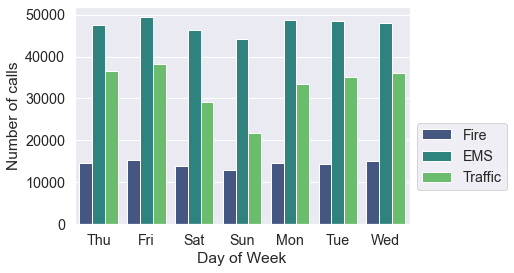

In [30]:
sns.countplot(x='Day of Week',data=calls,hue='Topic',palette='viridis')
plt.ylabel('Number of calls')
plt.legend(loc=0,bbox_to_anchor=(1.,0.5))

Here we can see a clear drop in traffic emergencies during the weekends as people don't drive to their work. Also even if they drive during the weekends usually they are not as sleepy or tired doing so that when they do it in workdays. We can also observe a drop in EMS emergencies during the weekend probably related to accidents at work. In the case of fire emergencies the number of calls are stablized. Now let's do the same by hour:

Text(0, 0.5, 'Number of calls')

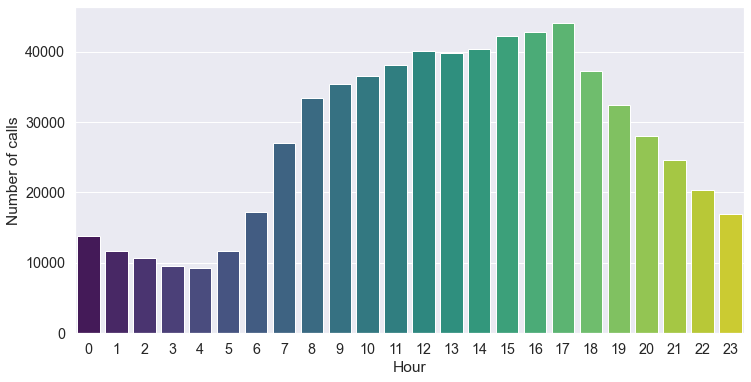

In [31]:
# First we do it for all the calls
plt.figure(figsize=(12,6))
sns.countplot(x='Hour',data=calls,palette='viridis')
plt.ylabel('Number of calls')

Here we notice a rise of emergency calls as the morning goes by. The emergencies stabalizes between 12-14 hours just to increase again until we reach the summit around 17h. Then the number of calls heavily drops as we aproach the night reaching the minimum value at 4h. Now let's represent also by hour in function of the type of emergency.

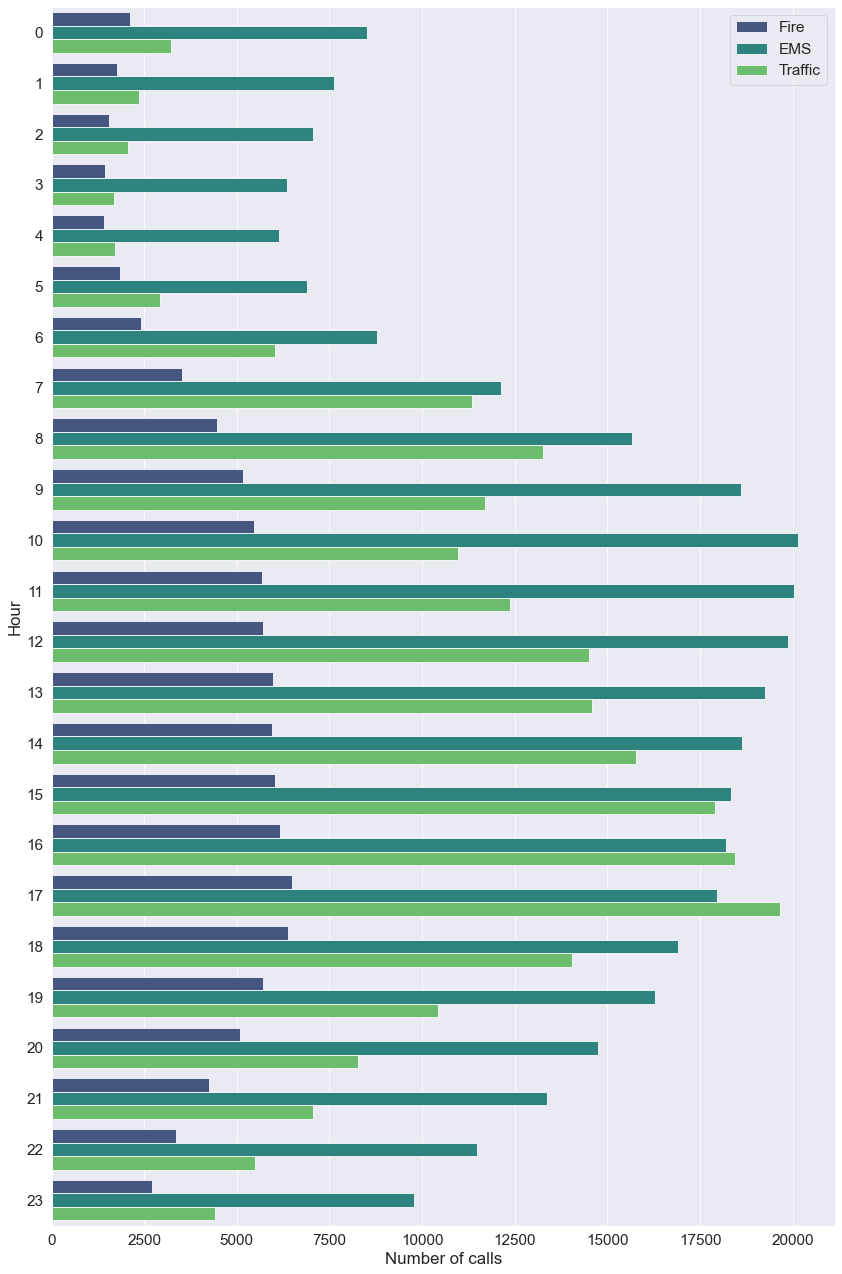

In [32]:
plt.figure(figsize=(12,18))
sns.set_context('paper',font_scale=1.75)
sns.countplot(y='Hour',data=calls,hue='Topic',palette='viridis')
plt.xlabel('Number of calls')
plt.tight_layout()
plt.legend(loc=0)

In this chart we can see the diferent behaviours of the three types of emergencies. In the case of the EMS we see that it reaches the summit around 10 a.m and then starts to drop. In the case of traffic it has a first pic around 8 a.m (when people goes to work) and a second and way bigger peak around 5 p.m (when people returns from work). Finally for fire emergencies it is more or less stabilized from 10 a.m to 6 p.m until it drops at night.

Since the number calls have its more pronunce variation when we represent by days of the week or hours we can ask what is the relation between these two. In order to do that we first need to restructure our dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [33]:
day_Hour=calls.groupby(['Day of Week','Hour']).count()['Topic'].unstack()

In [34]:
day_Hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


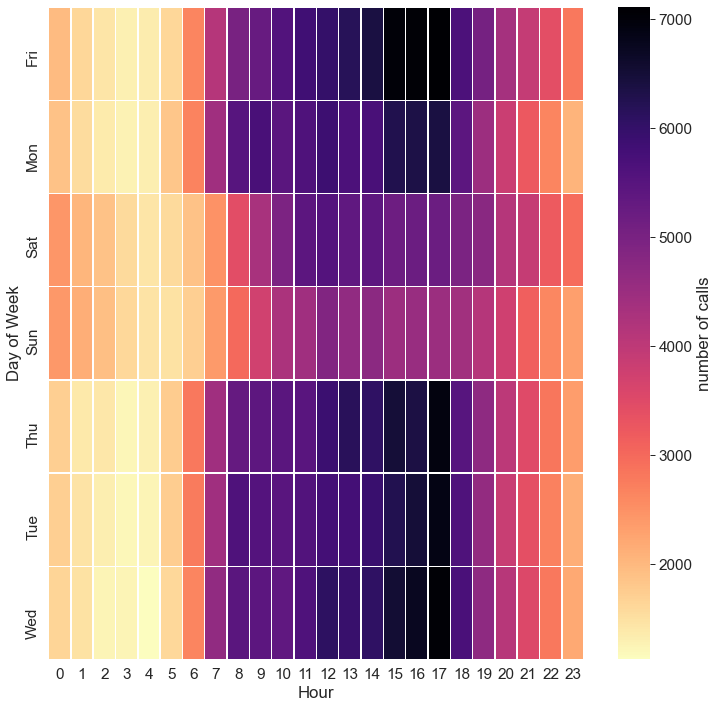

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(data=day_Hour,cmap='magma_r',linewidths=.5,cbar_kws={'label': 'number of calls'})

Here we can see how the highest numbers of calls are made between 3 p.m and  5 p.m during the working days specially on Friday and the lowest calls were made during 3 to 4 a.m at labour days at night. Another interesting insight is how during weekends there are way more emergency calls during the night specially between 0 to 2 a.m. It also seems that the heatmap for sunday and saturday are like 2 hours displaced this is probably due to that people during weekends tend to get up later.

We can now do a clustermap in order to see way better how the differents days and hours are similar between one and other.

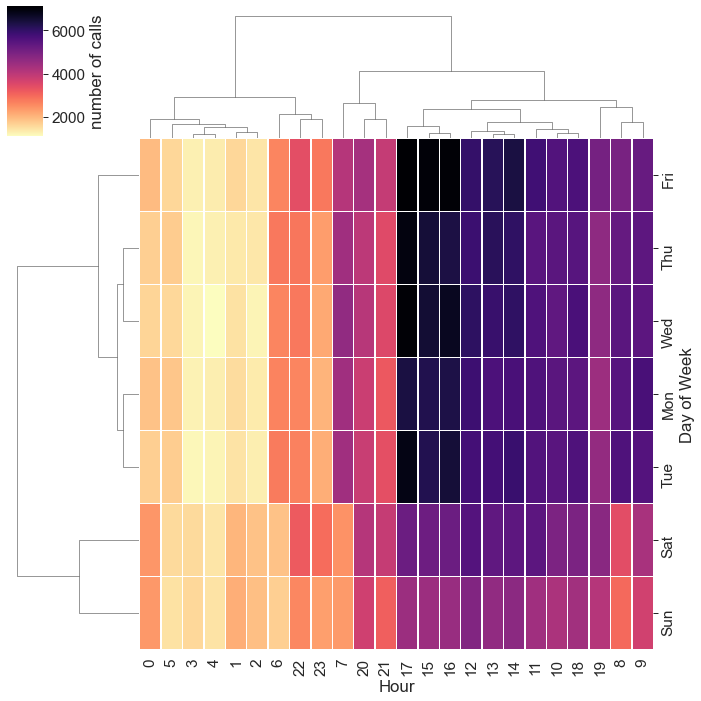

In [37]:
sns.clustermap(data=day_Hour,cmap='magma_r',linewidths=.5,cbar_kws={'label': 'number of calls'})

As we have previously said we can realise that there is clear separation between working days and weekends and also between day and night. 

Now let's see how the number of emergencies have evolved from 2015 to 2020. In order to do it we should make another column called date.

In [38]:
calls['Date'] = calls['timeStamp'].apply(lambda time: time.date())

In [39]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour,Date
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,10,Thu,14,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,2015,12,10,Thu,15,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,EMS,2015,12,10,Thu,16,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,Traffic,2015,12,10,Thu,16,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,EMS,2015,12,10,Thu,16,2015-12-10


Now we groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

In [40]:
byDate = calls.groupby('Date').count()

In [41]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444


Text(0, 0.5, 'Number of calls')

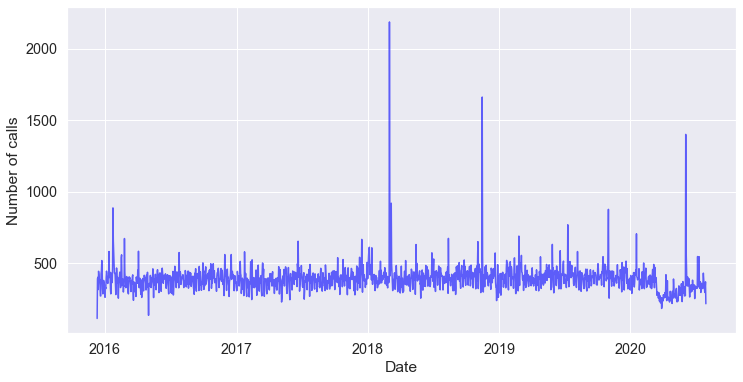

In [44]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale=1.3)
byDate['Topic'].plot(color='blue',alpha=0.6)
plt.ylabel('Number of calls')

What gathers our attention from this plot is the suddent peaks that we have. It may seem that an important event has happened but they can also be a sudden update of previous calls. Another thing that we can detect is a drop in the number of 911 calls during the second quarter of 2020. This could be caused due that because of covid lockdown the number of emergency calls for traffic and fire fall compensating the asumed EMS calls increase. 

Let's begin investigating the peaks and see if we can find its origin. What we should do first is do the same plot but for each emergency topic so we would have three diferent plots. 

In [45]:
byDate_EMS = calls[calls['Topic']=='EMS'].groupby('Date').count()
byDate_Fire = calls[calls['Topic']=='Fire'].groupby('Date').count()
byDate_Traffic = calls[calls['Topic']=='Traffic'].groupby('Date').count()

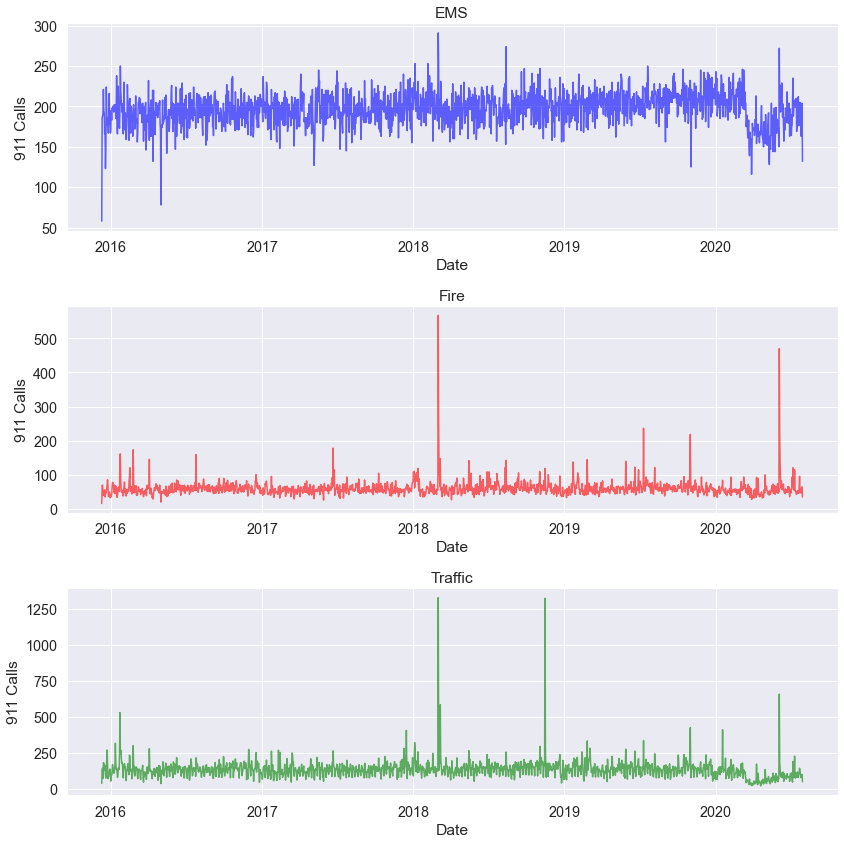

In [46]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(12,12))

axes[0].plot(byDate_EMS.index, byDate_EMS['Topic'],
             color='blue',alpha=0.6)
axes[1].plot(byDate_Fire.index, byDate_Fire['Topic'],
            color='red',alpha=0.6)
axes[2].plot(byDate_Traffic.index, byDate_Traffic['Topic'],
            color='green',alpha=0.6)

axes[0].set_title('EMS')
axes[1].set_title('Fire')
axes[2].set_title('Traffic')

axes[0].set_xlabel('Date')
axes[1].set_xlabel('Date')
axes[2].set_xlabel('Date')


axes[0].set_ylabel('911 Calls')
axes[1].set_ylabel('911 Calls')
axes[2].set_ylabel('911 Calls')


plt.tight_layout()




We can notice that the first peak is mostly due to fire and traffic calls, the second one was caused by traffic calls and the third one was a combination of the three types of emergencies.

In [47]:
# We can find the date of the three peaks easily this way:
byDate_Traffic[byDate_Traffic['Topic'] > 600]

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour
Date,,,,,,,,,,,,,,
2018-03-02,1328,1328,1328,1245,1328,1328,1328,1328,1328,1328,1328,1328,1328,1328
2018-11-15,1324,1324,1324,1169,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324
2020-06-03,659,659,659,608,659,659,659,659,659,659,659,659,659,659


Let's begin investigating the most recent one that happened at June 3rd of June of 2020. What were the most common type of calls that day?

In [48]:
calls[(calls['Year']==2020) & 
      (calls['Month']==6) & 
      (calls['Day']==3)]['title'].apply(lambda tit: 
      tit.split(':')[-1]).value_counts().head(10)

 ROAD OBSTRUCTION -             489
 ELECTRICAL FIRE OUTSIDE        209
 VEHICLE ACCIDENT -             114
 FIRE INVESTIGATION              63
 FIRE ALARM                      61
 RESPIRATORY EMERGENCY           42
 HAZARDOUS ROAD CONDITIONS -     37
 FALL VICTIM                     36
 VEHICLE ACCIDENT                35
 BUILDING FIRE                   24
Name: title, dtype: int64

We can see that the most common emergency calls from that day are somewhat related. If we investigate on the internet we would find that on this day the county of Montgomery in Pennsylvania had severe storms that caused among other things 3 dead and nearly 140k people without power.

Due to the heavy storms many roads were blocked or damaged. These storms also originated floods, electrical fire and lost of electricity in many homes. 

<img src="Flood.jpeg" style="width:400px;height=400px"/>


We can see more information in: https://www.wfmz.com/news/area/southeastern-pa/3-dead-nearly-140k-lose-power-after-severe-storms-in-montgomery-county/article_02b925cc-a5e3-11ea-8c1e-c73d45762c64.html

We can now investigate the peak from November 15th of 2018.

In [49]:
calls[(calls['Year']==2018) & 
      (calls['Month']==11) & 
      (calls['Day']==15)]['title'].apply(lambda tit: 
      tit.split(':')[-1]).value_counts().head(10)

 DISABLED VEHICLE -             825
 VEHICLE ACCIDENT -             430
 VEHICLE ACCIDENT                56
 HAZARDOUS ROAD CONDITIONS -     42
 RESPIRATORY EMERGENCY           29
 CARDIAC EMERGENCY               29
 FIRE POLICE NEEDED              26
 FIRE ALARM                      24
 FALL VICTIM                     21
 ELECTRICAL FIRE OUTSIDE         20
Name: title, dtype: int64

The most numerous calls for this day were road related: disabled vehicle, vehicle accident, hazardous road conditions. If we search on the internet we would see that a severe snow storm hit the Montgommery County, PA area. In fact it was the biggest november snow storm in three decades. This caused many traffic accident calls due to disabled vehicles.

<img src="snow.jpg" style="width:400px;height=400px"/>

We can read information about this event in: https://www.inquirer.com/philly/news/snow-philadelphia-winter-sleet-latest-20181115.html

Finally let's see what was the reason for the last peak at March 2nd from 2018. 

In [50]:
calls[(calls['Year']==2018) & 
      (calls['Month']==3) & 
      (calls['Day']==2)]['title'].apply(lambda tit: 
      tit.split(':')[-1]).value_counts().head(10)

 ROAD OBSTRUCTION -             650
 VEHICLE ACCIDENT -             430
 ELECTRICAL FIRE OUTSIDE        241
 DISABLED VEHICLE -             197
 VEHICLE ACCIDENT                92
 FIRE INVESTIGATION              87
 FIRE ALARM                      73
 HAZARDOUS ROAD CONDITIONS -     49
 FIRE POLICE NEEDED              49
 RESPIRATORY EMERGENCY           38
Name: title, dtype: int64

Here we have a lot of similarities with the heavy storm from the 3rd of June of 2020. We can see that the most common emergency are again road damage related and that there is also fire of electrical origin so we can assume that in this case another heavy storm hitted the county of Montgomery PA. Let's check it out searching in the internet. 

In this case the damage was due to a nor'easter (a extratropical cyclone in the western North Atlantic Ocean) unofficially named Winter Storm Riley by The Weather Channel. A satellite image of it was:

<img src="noreaster.png" style="width:400px;height=400px"/>

We can see further information about this storm at https://en.wikipedia.org/wiki/March_1%E2%80%933,_2018_nor%27easter

Now we want to see what exactly happened during the covid lockdown. Did the EMS emergencies increase or decreased? In order to see that we would represent the average EMS calls by day of the year during the 2016-2019 period and we will compare it with the 2020 data calls.

In [51]:
# We create a Dat of Year column
calls['Day of Year'] = calls['timeStamp'].apply(lambda time: time.dayofyear)

In [52]:
calls_1619['Day of Year'] = calls_1619['timeStamp'].apply(lambda time: time.dayofyear)

In [54]:
groupby_doy20=calls[(calls['Year']==2020) & 
        (calls['Topic']=='EMS')].groupby('Day of Year').count()

In [57]:
groupby_doy1619=calls_1619[(calls_1619['Topic']=='EMS')].groupby('Day of Year').count()

In [58]:
groupby_doy20.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Topic,Year,Month,Day,Day of Week,Hour,Date
Day of Year,,,,,,,,,,,,,,,
1,202,202,202,190,202,202,202,202,202,202,202,202,202,202,202
2,243,243,243,224,243,243,243,243,243,243,243,243,243,243,243
3,220,220,220,200,220,220,220,220,220,220,220,220,220,220,220
4,235,235,235,219,235,235,234,235,235,235,235,235,235,235,235
5,188,188,188,178,188,188,188,188,188,188,188,188,188,188,188


In [59]:
groupby_doy1619=groupby_doy1619/4
# We divide by 4 the results so we have the number of calls by year

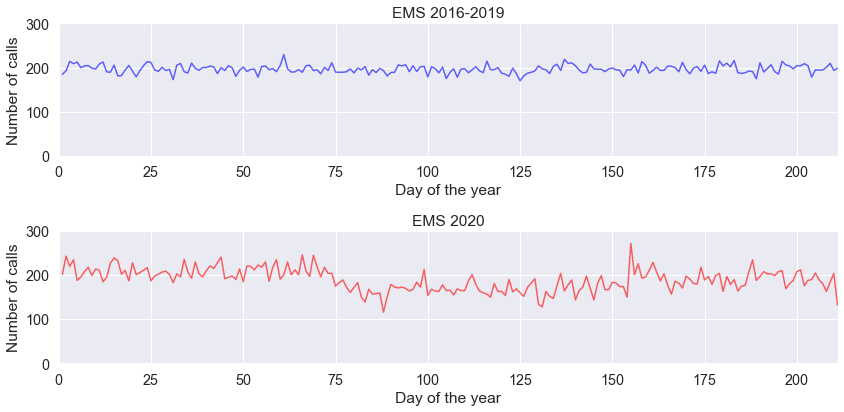

In [61]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(12,6))


axes[0].plot(groupby_doy1619.index, groupby_doy1619['Topic'],
             color='blue',alpha=0.6)
axes[1].plot(groupby_doy20.index, groupby_doy20['Topic'],
            color='red',alpha=0.6)

axes[0].set_xlim([0,211])
axes[1].set_xlim([0,211])

axes[0].set_title('EMS 2016-2019')
axes[1].set_title('EMS 2020')

axes[0].set_ylim([0,300])
axes[1].set_ylim([0,300])

axes[0].set_ylabel('Number of calls')
axes[1].set_ylabel('Number of calls')

axes[0].set_xlabel('Day of the year')
axes[1].set_xlabel('Day of the year')



plt.tight_layout()


We clearly see a drop in the EMS calls during the start at the lockdown for the coranavirus pandemic. This is due to two reasons the first and most clear one is that local authorities discourage people to call 911 providing a diferent number for covid emergencies. Therefore, the covid emergency calls are not registered. 
The second reason is that people were fearful of going to the hospital because of the risk of getting the virus there. Hence, there were far less emergency calls for minor issues. 

We can found information about covid at Montgomery County in: 
https://www.montcopa.org/513/Public-Health

Also we can find more information in the Pennsylvania Department of Health website: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Coronavirus.aspx

Finally let's now investigate about the location of the received calls. First we do a barplot about the top townships per emergency calls. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

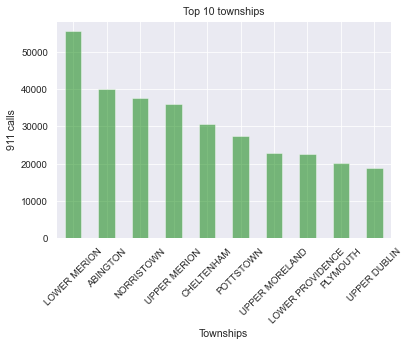

In [62]:
sns.set_context('paper',font_scale=1.1)
calls['twp'].value_counts().head(10).plot.bar(color='green',alpha=0.5)
plt.xlabel('Townships')
plt.ylabel('911 calls')
plt.title('Top 10 townships')
plt.xticks(rotation=45)

We can also do the same regarding zip codes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

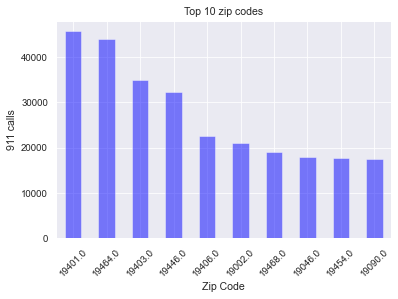

In [63]:
calls['zip'].value_counts().head(10).plot.bar(color='blue',alpha=0.5)
plt.xlabel('Zip Code')
plt.ylabel('911 calls')
plt.title('Top 10 zip codes')
plt.xticks(rotation=45)

Finally we can represent the longitud and latitude of the phone calls 

Text(0.5, 1.0, 'Locations of the Emergency calls')

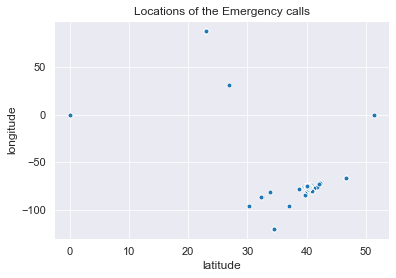

In [69]:
sns.set_context('paper',font_scale=1.25)
sns.scatterplot(x='lat',y='lng',data=calls)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Locations of the Emergency calls')

We can notice that there is a concentration of points around (40,-75). So we can do an scatter plot around this crowded area in otder so see it in detail. 

Text(0, 0.5, 'longitude')

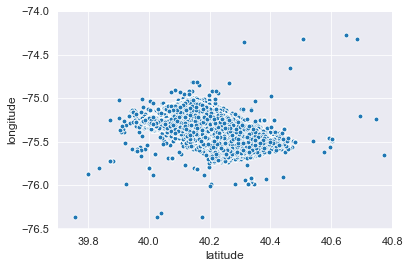

In [70]:
sns.scatterplot(x='lat',y='lng',data=calls)
plt.ylim([-76.5,-74])
plt.xlim([39.7,40.8])
plt.xlabel('latitude')
plt.ylabel('longitude')

Text(0, 0.5, 'longitude')

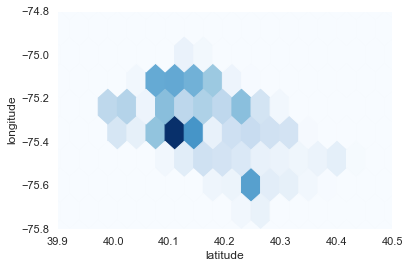

In [71]:
plt.hexbin(calls['lat'],calls['lng'],gridsize=1500,cmap='Blues')
plt.xlim([39.9,40.5])
plt.ylim([-75.8,-74.8])
plt.xlabel('latitude')
plt.ylabel('longitude')

My idea for this part was to do an interactive plot of the townships in Montgomery County PA. But I haven't found a way of doing a geographical plot for townships. If you know how to do it you can post a comment about it. You can also post a comment for whatever reason you want like suggestionts, improvemnts, how I did something etc. On the other hand this notebook is not a closed case since I think you can extract more juice with this dataset but I prefer to do it in another moment so I can focus in new projects even though I plan to update it in the future.  